In [ ]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import os, sys, email, re, string
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
import regex as re # Regular Expression
from sqlalchemy import create_engine
from PIL import Image
from palettable.colorbrewer.qualitative import Dark2_8
import numpy as np
import random
# Stopwords: Stop words include the large number of prepositions, pronouns, conjunctions etc in sentences.
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
engine = psycopg2.connect(
                     host = "database-1.cartuziufdwi.us-east-1.rds.amazonaws.com",
                     database = "postgres",
                     user = "postgres",
                     password = "password1!",
                     port = "5432" )

In [ ]:
cur = engine.cursor()
cur.execute("select * from corpus_sub")
data= cur.fetchall()
corpus_sub_df = pd.DataFrame(data)
engine.close()

In [ ]:
corpus_sub_df

0
0       stearns prediction telecom latin america
1                                     power line
2                                          issue
3                                          issue
4                                    margin plan
...                                          ...
216248                            trade lavorato
216249                                 gas hedge
216250                              confidential
216251                         analyst associate
216252                                       ali

[216253 rows x 1 columns]

In [ ]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])

In [ ]:
# Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

# Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown",'fwd','RE','FW','b','c',
    'enron','hou','ect','corp','please','vince','time','mail','john','kay','day','message','week','kaminski','year','e','r','l','th',
    'meeting','enronxgate','question','group','work','call','scott','change','company','let','mann','date','number','asp','ee','id',
    'mark','today','david','mike','issue','houston','chris','subject','way','bass','jeff','edu','office','doc','don','j','f','image',
    'month','copy','name','comment','email','need','phone','point','thing','request','look','ben','michael','list','rows','columns',
    'help','delainey','fax','morning','use','tomorrow','thank','phillip','hotmail','guy','robert','night','lon','p','zuffe','x','pdf',
    'part','talk','kate','home','mailto','person','address','form','jeffrey','something','end','line','hour','k','prc','spec','inc',
    'place','march','love','anything','paul','giron','smith','hope','darron','jim','kevin','weekend','george','book','report','w','letter',
    'north','someone','section','richard','discus','bob','jacoby','ena','room','see','demand','desk','area','acrobat','stephane','comment',
    'everyone','greg','detail','jason','afternoon','discussion','tom','kslaw','check','basis','visit','mcconnell','adobe','brodeur','letter',
    'miller','entity','location','peter','monday','response','show','page','jennifer','lot','meet','respond','fon','im','src','gif','year',
    'yesterday','pdx','house','june','larry','jan','dan','city','july','judy','friday','julie','shirley','meter','cand','tor','lal','time',
    'Hello','Meeting','Ga','Access','positions','list','forward','floor','collar','fixed','thanks','script','face','mini','adobe','','align',
    'level','fyi','addition','martin','anyone','generation','department','type','rick','friend','period','word','player','cooke','doucet',
    'lisa','think','class','johnson','org','robin','thompson','columbiagas','didn','april','william','lee','thomas','cc','zufferli','html',
    'hey','adam','stephen','man','sender','tim','taylor','organization','center','everything','ferc','notice','pm','mp','tr','td','e','asp',
    'start','davis','york','sorry','cell','return','street','hernandez','thursday','campbell','care','content','get','thanks','perlman','g',
    'curve','minute','floor','stinson','janet','head','move','kind','kent','tuesday','sheila','send','suzanne','br','note','burchfield','james',
    'brenda','kim','matter','fgt','carolyn','cindy','ccampbell','tell','fwd','crenshaw','baumbach','linda','side','ee','people','divine','co',
    'clark','mind','hain','wharton','future','errol','carlos','hand','matt','bruce','gossett','brian','try','br','font','size','draper','livia',
    'wednesday','calendar','laura','nothing','doug','llc','rebecca','rob','stephanie','austin','victor','join','helvetica','dawn','ymca',
    'joseph','couple', 'allen', 'kean', 'arnold', 'var', 'keith', 'lucy', 'grigsby','http','www','image','com','sportsline','href','aol','fw']

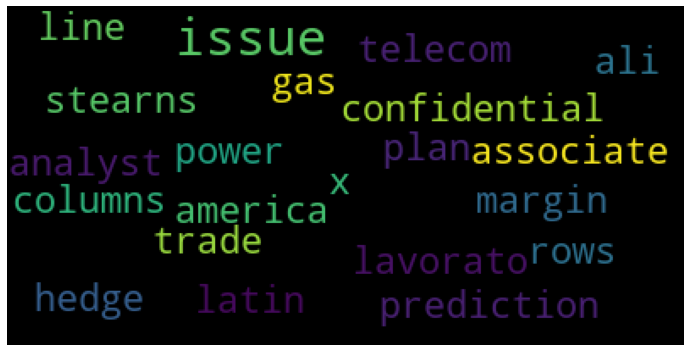

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.rcParams["figure.figsize"] = (10, 5) # Frame size
wordcloud1 = WordCloud(  
  background_color='black',
  stopwords=stop_words,
  max_words=224107,
  max_font_size=30, 
  random_state=42,
  # Render resolution
  width=400,
  height=200
  ).generate(str(corpus_sub_df))
                         
fig = plt.figure(1)
plt.imshow(wordcloud1)
plt.axis('off')
fig.tight_layout()
plt.show()

In [ ]:
logo = np.array(Image.open("Enron.png"))
print(logo)
               
# generate word cloud
wc = WordCloud(  
  background_color='black',
  stopwords=stop_words,
  max_words=224107,
  mask=logo,
  max_font_size=50, 
  random_state=42,
    ).generate(str(corpus_sub_df))
wc.recolor(color_func=color_func, random_state=3)

wc.to_file('word_cloud.png') #save wordcloud to the computer
plt.figure(figsize=(500,350))
plt.imshow(wc, interpolation="bilinear")
fig.tight_layout()
plt.axis("off")

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


(-0.5, 1599.5, 999.5, -0.5)